# Miniproyecto Sección 10

## Importación de Librerías

Se importan las librerías esenciales para facilitar el análisis, que abarca la carga de datos, la visualización, la transformación, la fusión y la unión. Además, se configura el entorno para suprimir las advertencias (`warnings`) y asegurar que la salida del código sea más limpia y enfocada en los resultados.

In [62]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats.mstats import winsorize

## Lectura del Dataset

Para iniciar el proceso de análisis, se procede a cargar el dataset descargado en el entorno de trabajo utilizando la biblioteca Pandas. El archivo `heart.csv` contiene toda la información clínica de los pacientes que será objeto de estudio en este proyecto.



In [63]:
df = pd.read_csv("C:/Users/david/Downloads/heart.csv")

Se muestran las primeras filas del DataFrame.  

In [64]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Se muestran las últimas filas del DataFrame.  

In [65]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Se emplea el método `df.info()` para evaluar la estructura y calidad inicial del dataset. Este análisis revela información sobre la composición de los datos, incluyendo el número total de registros (filas) y variables (columnas), los tipos de datos asociados a cada campo (como objetos, enteros o valores flotantes), y la cantidad de valores no nulos por columna.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


El resultado del método `info()` indica que el dataset está en un estado **óptimo y listo para el análisis**, sin problemas inmediatos de integridad de datos. A continuación, se desglosa el análisis:

**1. Dimensión del Dataset:**
*   **`RangeIndex: 918 entries, 0 to 917`**: El dataset contiene **918 registros o pacientes**, cada uno identificado por un índice del 0 al 917. Este es un tamaño muy adecuado para un proyecto de análisis y machine learning.

**2. Integridad de los Datos (Ausencia de Valores Nulos):**
*   **`Non-Null Count: 918 non-null` para todas las columnas**. Este es el hallazgo más importante. **No hay valores faltantes (Missing Values)** en ninguna de las 12 columnas. Esto elimina la necesidad de realizar técnicas de imputación o eliminación de datos, simplificando significativamente la fase de preprocesamiento.

**3. Tipos de Datos (Dtypes):**
Los tipos de datos están correctamente asignados, lo que sugiere que la carga del archivo CSV fue exitosa. Se identifican tres tipos:

*   **`int64` (6 columnas)**: Variables enteras. Incluyen `Age` (edad), `RestingBP` (presión arterial), `Cholesterol` (colesterol), `FastingBS` (glucemia, que es binaria pero codificada como 0/1), `MaxHR` (frecuencia cardíaca máxima) y la variable objetivo `HeartDisease`. Son correctos.
*   **`float64` (1 columna)**: Variable decimal. Solo `Oldpeak` (depresión del ST) tiene este tipo, lo cual es apropiado ya que esta medida clínica suele ser un valor continuo.
*   **`object` (5 columnas)**: Variables categóricas (texto). Incluyen `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina` y `ST_Slope`. Antes de modelar, será necesario convertirlas a formato numérico mediante técnicas como **One-Hot Encoding**.

**4. Uso de Memoria:**
*   **`memory usage: 86.2+ KB`**: El dataset es muy liviano, ocupando aproximadamente 86 kilobytes en memoria. Esto permite manipularlo y procesarlo con gran facilidad sin preocupaciones por rendimiento.


### Valores Únicos

Se calcula el número de valores únicos para cada variable del DataFrame.

In [67]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Este análisis complementa la información de `df.info()` y revela el **grado de diversidad y el tipo de variable** con la que trabajamos en cada columna.

**Variables Categóricas:**

*   **`Sex: 2`**: Confirma que es una variable binaria con dos categorías, 'M' y 'F'.
*   **`ChestPainType: 4`**: Existen los 4 tipos de dolor torácico definidos en la descripción: TA, ATA, NAP, ASY.
*   **`RestingECG: 3`**: Coincide con las 3 categorías esperadas: Normal, ST, LVH.
*   **`ExerciseAngina: 2`**: Variable binaria con dos valores: 'Y' (Yes) y 'N' (No).
*   **`ST_Slope: 3`**: Confirma las 3 pendientes posibles: Up, Flat, Down.
*   **`FastingBS: 2` & `HeartDisease: 2`**: Ambas son variables binarias codificadas numéricamente (0 y 1), lo cual es correcto.

**Variables Numéricas:**

*   **`Age: 50`**: Hay 50 valores únicos de edad en 918 pacientes. Esto sugiere una **distribución bastante diversa** y que la edad está representada en un rango amplio, lo cual es positivo para el modelo.
*   **`RestingBP: 67`**: Existen 67 valores únicos de presión arterial. Esto indica que es una **variable continua** con buena variabilidad, pero se debe verificar que no haya valores erróneos (ej., presiones arteriales de 0 mm Hg, que serían inviables).
*   **`Cholesterol: 222`**: Este es un hallazgo **crucial y que requiere atención inmediata**. Tener 222 valores únicos en 918 registros sugiere que es una variable continua con una variabilidad muy alta en la muestra.
*   **`MaxHR: 119`**: Tiene 119 valores únicos, lo que es esperable para una medida de frecuencia cardíaca máxima, comportándose como una variable continua saludable.
*   **`Oldpeak: 53`**: Presenta 53 valores únicos, lo que confirma su naturaleza de variable numérica continua (float) con una precisión decimal adecuada.

## Análisis Univariado

El Análisis Univariado es la primera fase del análisis exploratorio de datos. Se enfoca en el estudio individual de cada variable para entender su distribución, características y valores atípicos. Esto permite identificar patrones y la calidad de los datos antes de un análisis más complejo.

### Variables Binarias

Se identifican y analizan las variables binarias (aquellas con solo 2 valores únicos) en el DataFrame. Luego, se genera un doble gráfico para cada variable binaria, permitiendo comparar su distribución mediante:

1. **Gráfico de Barras**:  
    - Muestra el conteo absoluto de cada categoría.  
    - Ideal para comparar magnitudes visualmente.
    
2. **Gráfico de Torta**:  
    - Muestra la proporción porcentual de cada categoría.  
    - Útil para entender el balance/imbalance entre clases.


=== SEX ===


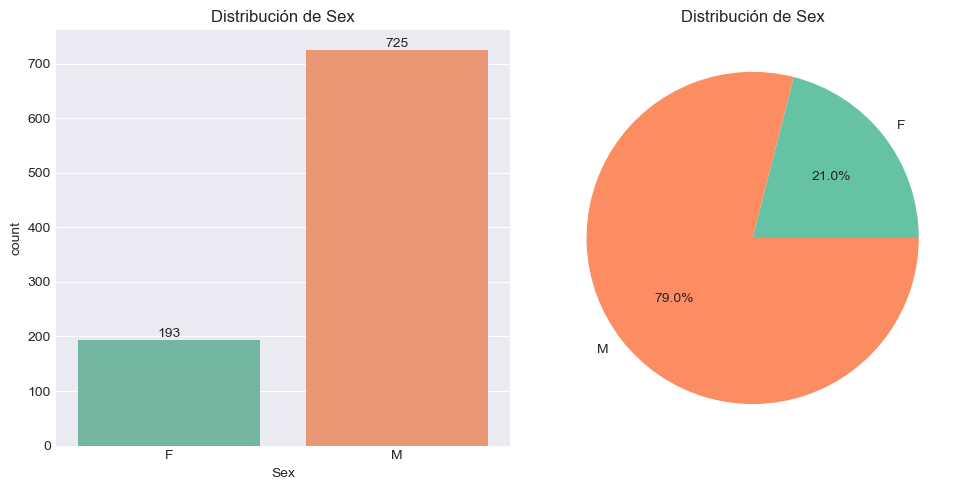


=== FASTINGBS ===


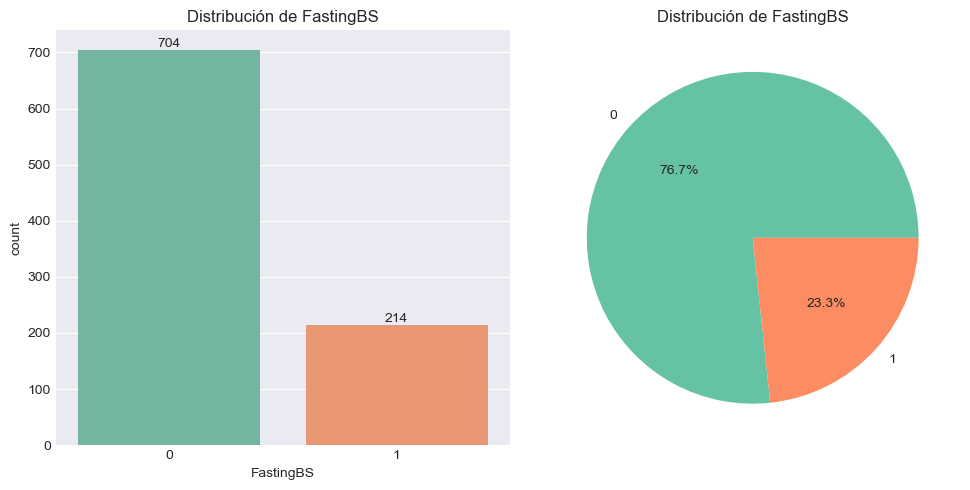


=== EXERCISEANGINA ===


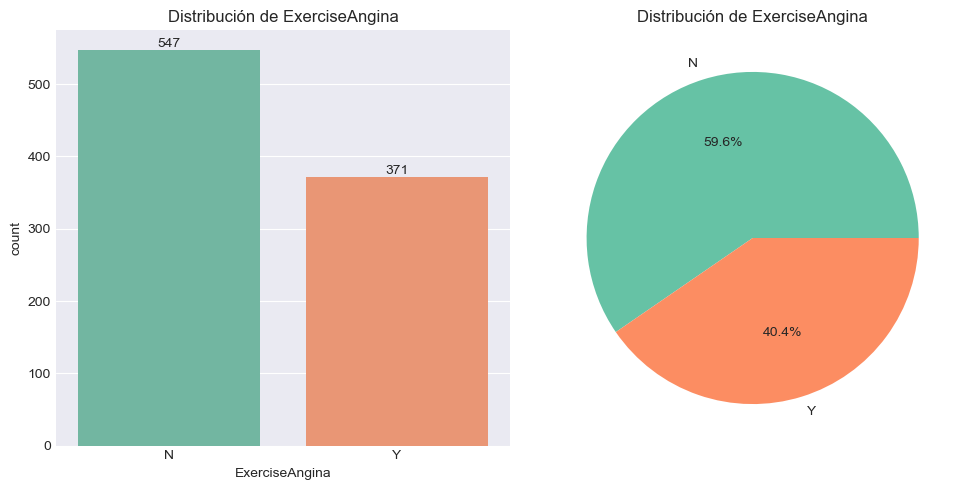


=== HEARTDISEASE ===


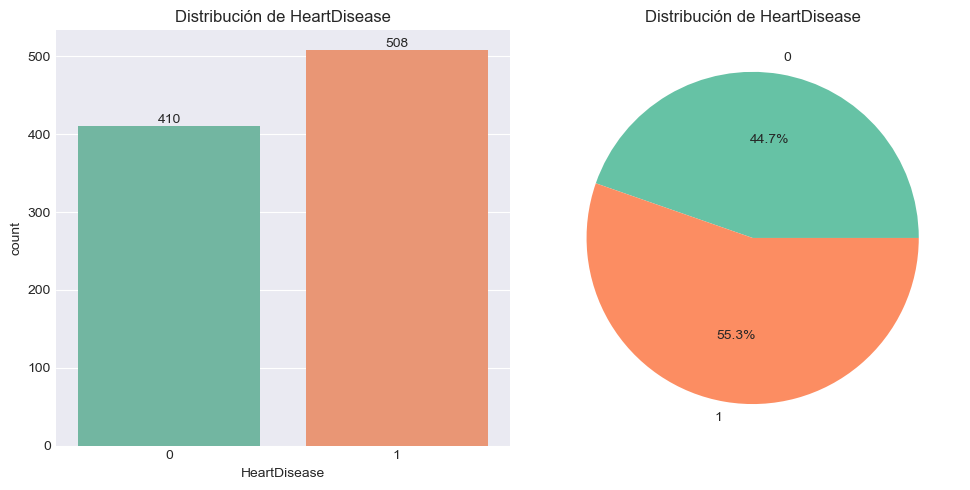

In [68]:
plt.style.use('seaborn-v0_8-darkgrid')
binarias = [col for col in df.columns if df[col].nunique() == 2]
for col in binarias:
    
    print(f"\n=== {col.upper()} ===")
    plt.figure(figsize=(10, 5))
    
    value_order = sorted(df[col].unique())
    colors = sns.color_palette('Set2')
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=df[col], palette=colors, order=value_order)
    plt.title(f'Distribución de {col}')

    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.subplot(1, 2, 2)
    counts = df[col].value_counts().loc[value_order]  
    plt.pie(counts, 
            labels=counts.index, 
            autopct='%1.1f%%',
            colors=colors) 
    plt.title(f'Distribución de {col}')
    
    plt.tight_layout()
    plt.show()

**1. Distribución de Sex (Sexo)**
*   **Proporción:** 79% Masculino (M) vs 21% Femenino (F).
*   **Interpretación:** Existe un **desequilibrio significativo** en la representación por sexo. El dataset está predominantemente compuesto por pacientes masculinos (725 hombres vs 193 mujeres).

**2. Distribución de FastingBS (Glucemia en Ayunas)**
*   **Proporción:** 76.7% con valor 0 (FastingBS ≤ 120 mg/dl) vs 23.3% con valor 1 (FastingBS > 120 mg/dl).
*   **Interpretación:** La mayoría de los pacientes presentan niveles normales de azúcar en sangre en ayunas. Aproximadamente 1 de cada 4 pacientes (214 individuos) tiene glucemia elevada, que es un factor de riesgo conocido para enfermedades cardiovasculares.

**3. Distribución de ExerciseAngina (Angina Inducida por Ejercicio)**
*   **Proporción:** 59.6% No (N) vs 40.4% Sí (Y).
*   **Interpretación:** La angina inducida por el ejercicio está presente en una proporción muy alta de pacientes (371 casos). Dado que esta es una variable clínica directamente relacionada con la isquemia cardíaca, se espera que sea un **predictor muy fuerte** de la enfermedad.

**4. Distribución de HeartDisease (Variable Objetivo - Enfermedad Cardíaca)**
*   **Proporción:** 55.3% con enfermedad (1) vs 44.7% sin enfermedad (0).
*   **Interpretación:** **El dataset está ligeramente desbalanceado** a favor de la clase positiva (enfermedad presente). Hay 508 pacientes con enfermedad cardíaca y 410 sin ella.

### Variables Categóricas

Se generan gráficos de barras para visualizar la distribución de cada variable categórica. 

**Cada gráfico muestra**:

- El número absoluto de observaciones (conteo).
- El porcentaje relativo respecto al total.
- Las categorías ordenadas de mayor a menor.


=== CHESTPAINTYPE ===


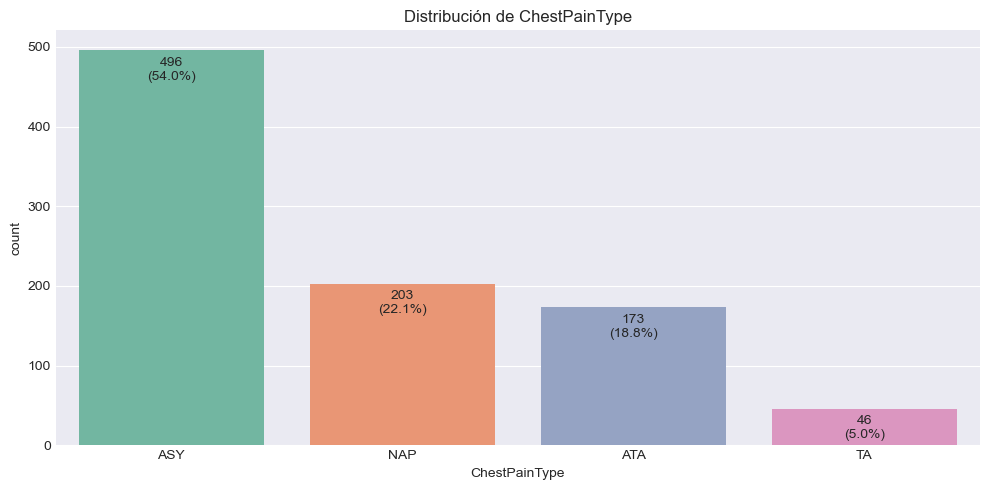


=== RESTINGECG ===


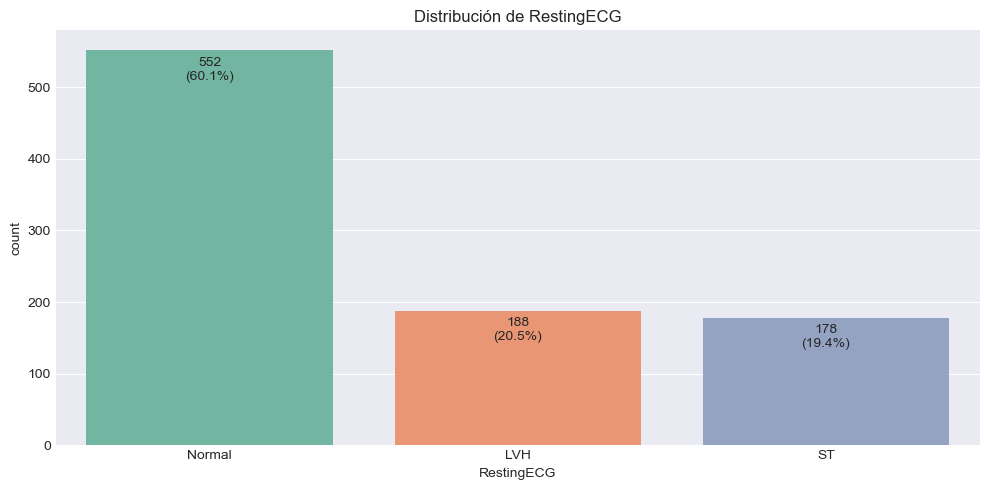


=== ST_SLOPE ===


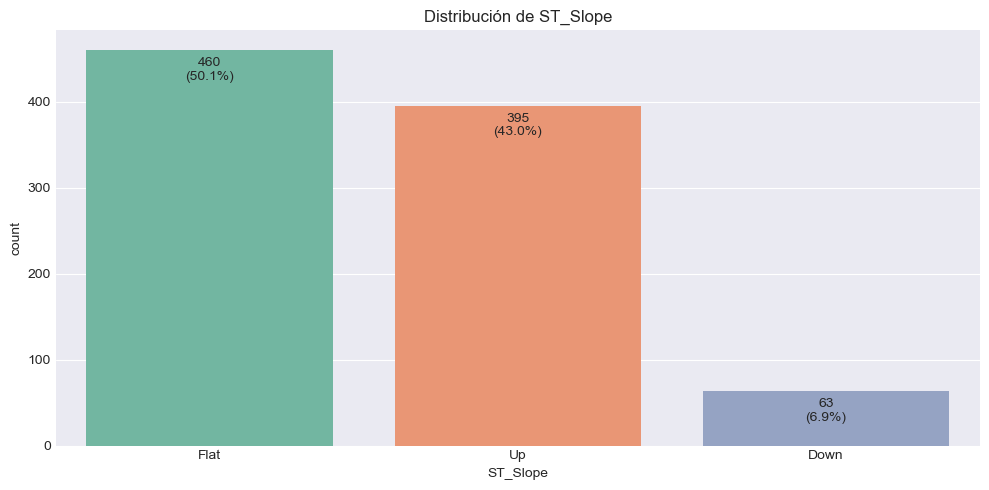

In [69]:
categoricas = df.columns[df.dtypes == 'object'].tolist()
categoricas = [col for col in categoricas if df[col].nunique() > 2]

for col in categoricas:
    
    print(f"\n=== {col.upper()} ===")
    
    plt.figure(figsize=(10, 5))
    
    value_order = df[col].value_counts().index
    
    ax = sns.countplot(x=df[col], order=value_order, palette='Set2')
    
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * p.get_height() / len(df[col])
        ax.annotate(f'{count}\n({percent:.1f}%)',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, -14),
                    textcoords='offset points')
        
    plt.title(f'Distribución de {col}')
    
    plt.tight_layout()
    plt.show()

**1. Distribución de ChestPainType (Tipo de Dolor Torácico)**
*   **Proporción:** **ASY (Asintomático): 54.0%** > NAP (Dolor No Anginoso): 22.1% > ATA (Angina Atípica): 18.8% > TA (Angina Típica): 5.0%
*   **Interpretación:** Existe una **predominancia abrumadora de pacientes asintomáticos (ASY)**. Más de la mitad de la cohorte no reportó dolor torácico, a pesar de estar siendo evaluados por enfermedad cardíaca.
*   **Implicación para el modelo:** Este es un hallazgo clínicamente crucial. La ausencia de síntomas (ASY) es, en este contexto, un **potente predictor de enfermedad cardíaca**. Sugiere que la condición puede estar enmascarada o ser "silenciosa", haciendo que las otras variables clínicas y de pruebas de esfuerzo sean aún más importantes para el diagnóstico. La angina típica (TA), clásicamente asociada a problemas coronarios, es la menos frecuente.

**2. Distribución de RestingECG (Electrocardiograma en Reposo)**
*   **Proporción:** **Normal: 60.1%** > LVH: 20.5% > ST: 19.4%
*   **Interpretación:** La mayoría de los pacientes presentan un ECG en reposo normal. Las anomalías se dividen de manera similar entre hipertrofia ventricular izquierda (LVH) y anomalías en la onda ST-T.
*   **Implicación para el modelo:** Un ECG en reposo normal es común incluso en pacientes con enfermedad cardíaca, por lo que esta variable por sí sola podría no ser un discriminador fuerte. La presencia de LVH (un indicador de esfuerzo cardíaco crónico) y anomalías ST-T (asociadas a isquemia) son hallazgos más específicos que probablemente se correlacionen con la variable objetivo.

**3. Distribución de ST_Slope (Pendiente del Segmento ST)**
*   **Proporción:** **Flat (Plana): 50.1%** > Up (Ascendente): 43.0% > Down (Descendente): 6.9%
*   **Interpretación:** La pendiente plana es la más frecuente, seguida de cerca por la ascendente. La pendiente descendente, que es el hallazgo más preocupante, es la menos común.
*   **Implicación para el modelo:** La **pendiente plana es un fuerte marcador de isquemia miocárdica**. Que sea la categoría más común en este dataset de pacientes con sospecha de enfermedad es un indicador de que la prueba de esfuerzo fue muy efectiva para identificar anomalías. Se anticipa que "Flat" y "Down" serán predictores muy fuertes de enfermedad cardíaca, mientras que "Up" (normal) se asociará con la ausencia de la enfermedad.

### Variables Númericas

Se genera una tabla para visualizar algunos estadísticos descriptivos para las variables númericas.

In [70]:
numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numericas = [col for col in numericas if df[col].nunique() > 2]

df[numericas].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


**Hallazgos Críticos y Posibles Errores**

1.  **`RestingBP (Presión Arterial en Reposo)`:**
    *   **Problema Grave:** El **mínimo es 0.000000** (`min: 0.000000`).
    *   **Interpretación:** Una presión arterial de 0 mm Hg es **clínicamente imposible** (indicaría la muerte del paciente). Esto son **valores faltantes (missing values) disfrazados**.
    *   **Acción Necesaria:** Identificar y manejar estos registros (imputación o eliminación).

2.  **`Cholesterol (Colesterol Sérico)`:**
    *   **Problema Grave:** El **mínimo es 0.000000** (`min: 0.000000`).
    *   **Interpretación:** Un nivel de colesterol de 0 mm/dl es **biológicamente imposible**. Al igual que con `RestingBP`, estos son missing values codificados como 0.
    *   **Acción Necesaria:** Es crucial investigar cuántos registros están afectados y decidir una estrategia.

**Análisis de Variables Numéricas "Sanas"**

3.  **`Age (Edad)`:**
    *   **Distribución:** La edad media de los pacientes es de 53.5 años (`mean: 53.5`), con una desviación estándar de 9.4 años (`std: 9.4`). El 50% de los pacientes (mediana) tiene entre 47 y 60 años (`25%: 47`, `75%: 60`).
    *   **Interpretación:** La distribución es normal, centrada en la mediana edad, que es la población típica de riesgo para enfermedades cardíacas. No se observan valores atípicos imposibles (rango de 28 a 77 años es válido).

4.  **`MaxHR (Frecuencia Cardíaca Máxima)`:**
    *   **Distribución:** La media es de 136.8 lpm (`mean: 136.8`). Los percentiles (25%, 50%, 75%) muestran una distribución simétrica.
    *   **Interpretación:** El rango (60-202 lpm) es fisiológicamente posible. No hay valores evidentemente erróneos. Es una variable de buena calidad.

5.  **`Oldpeak (Depresión del ST)`:**
    *   **Distribución:** La media es 0.89 (`mean: 0.887`), pero la mediana es 0.6 (`50%: 0.6`), lo que sugiere una distribución asimétrica (sesgada a la derecha). La mayoría de los valores (75%) están por debajo de 1.5.
    *   **Interpretación:** El valor mínimo de -2.6 es clínicamente plausible (puede indicar elevación). El valor máximo de 6.2 es alto pero posible, indicando una depresión significativa del segmento ST.

#### Manejo de Valores Clínicamente Imposibles

Se identificaron valores iguales a 0 en las variables `Cholesterol` y `RestingBP`, los cuales son clínicamente imposibles. Estos valores se interpretan como missing values y se procede a reemplazarlos por `NaN` para un tratamiento adecuado posterior.

In [71]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)

Para cuantificar la magnitud de datos ausentes en ambas columnas, se calculó el porcentaje de valores nulos mediante `df.isnull().mean() * 100`. 

In [72]:
df.isnull().mean() * 100

Age                0.000000
Sex                0.000000
ChestPainType      0.000000
RestingBP          0.108932
Cholesterol       18.736383
FastingBS          0.000000
RestingECG         0.000000
MaxHR              0.000000
ExerciseAngina     0.000000
Oldpeak            0.000000
ST_Slope           0.000000
HeartDisease       0.000000
dtype: float64

Debido a que la cantidad de valores nulos en `RestingBP` es pequeña, eliminar los registros con valores faltantes no afectará significativamente el análisis.

In [73]:
df = df.dropna(subset=['RestingBP'])

Se verifica el nuevo tamaño del dataset.

In [74]:
df.shape

(917, 12)

Para manejar los valores faltantes en la variable `Cholesterol` identificados previamente, se implementó el método MICE (Multiple Imputation by Chained Equations). Esta técnica utiliza las relaciones entre las variables numéricas del dataset para imputar los valores missing de manera iterativa, preservando la estructura estadística de los datos.

In [75]:
df_mice = df.copy()

mice = IterativeImputer(max_iter=10, random_state=42)
df_mice[numericas] = mice.fit_transform(df_mice[numericas])

df['Cholesterol'] = df_mice['Cholesterol']

Se verifican los cambios realizados.

In [76]:
df.isnull().mean() * 100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

Una vez aplicada las imputaciones se procede a verificar las estadísticas descriptivas de las variables tratadas para evaluar cómo ha impactado el proceso en su distribución y asegurar la conservación de sus propiedades estadísticas fundamentales.

In [77]:
df[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,244.638971,132.540894
std,53.383904,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,242.824123,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


**1. Estrategia Aplicada**
- **`RestingBP`:** Al tener menos del 1% de valores nulos (una sola observación), se optó por la **eliminación** de dicho registro. Esta es una estrategia conservadora y válida que evita introducir sesgo por imputación cuando el impacto en el tamaño de la muestra es mínimo.
- **`Cholesterol`:** Al tener un porcentaje significativo de valores nulos (18%), se aplicó el método **MICE (Multiple Imputation by Chained Equations)**, una técnica avanzada que preserva la estructura estadística de los datos.

**2. Evaluación de `RestingBP` Post-Eliminación**
- **Estabilidad de la distribución:** Las estadísticas descriptivas se mantienen prácticamente idénticas a las originales.
- **Rango clínico válido:** El mínimo de **80 mm Hg** y máximo de **200 mm Hg** son valores fisiológicamente posibles, indicando que la limpieza fue efectiva.
- **Conclusión:** La eliminación del único valor nulo no impactó la representatividad de la variable.

**3. Evaluación de `Cholesterol` Post-Imputación MICE**
- **Cambio en la tendencia central:** La **media aumentó de 198.8 a 244.6 mg/dl**, lo que sugiere que los valores faltantes correspondían predominantemente a pacientes con niveles de colesterol más altos.
- **Distribución más realista:** 
  - El **mínimo de 85 mg/dl** es clínicamente posible (se eliminaron los valores 0 imposibles).
  - La **mediana de 242.8 mg/dl** indica que la mayoría de los pacientes se encuentran en rango de colesterol límite alto/alto.
  - El **máximo de 603 mg/dl** representa casos de hipercolesterolemia severa real.

**4. Impacto General en la Calidad del Dataset**
- **Integridad:** Ambas variables ahora tienen **0 valores nulos**.
- **Validez clínica:** Todos los valores están dentro de rangos fisiológicamente posibles.
- **Consistencia:** Se mantuvo la variabilidad natural de las mediciones clínicas.
- **Preparación para modelado:** El dataset está listo para proceder con las siguientes etapas de análisis.

**Conclusión:** Las estrategias de tratamiento de valores faltantes fueron apropiadas y efectivas, produciendo un dataset más robusto y clínicamente válido para el modelado predictivo.



---

Se genera un histograma y un boxplot para visualizar la distribución de frecuencias e identificar outliers (puntos fuera de los bigotes) y la dispersión de los datos. Además se evalua:

- **Asimetría**:
    - `skew = 0`: Distribución simétrica (valores aceptables skew $\in (-1,1)$).
    - `skew > 0`: Mayor peso en la cola izquierda de la distribución (sesgo positivo).
    - `skew < 0`: Mayor peso en la cola derecha de la distribución (sesgo negativo).

- **Kurtosis**: Determina si una distribución tiene colas gruesas con respecto a la distribución normal. Proporciona información sobre la forma de una distribución de frecuencias.
    - `kurtosis = 3`: se denomina mesocúrtica (distribución normal).
    - `kurtosis < 3`: se denomina platicúrtica (distribución con colas menos gruesas que la normal).
    - `kurtosis > 3`: se denomina leptocúrtica (distribución con colas más gruesas que la normal) y significa que trata de producir más valores atípicos que la distribución normal.

- **Coeficiente de Variación**: Es una medida estadística que se utiliza para evaluar la variabilidad relativa de una muestra en relación con su media. Se calcula como la desviación estándar de los datos dividida por la media, y se expresa como un porcentaje multiplicado por 100 para facilitar su interpretación.

Para el número de Bins se utiliza la **Regla de Rice**.


=== AGE ===
Skew: -0.2
Kurtosis:  -0.39
Coeficiente de Variación:  17.64 %


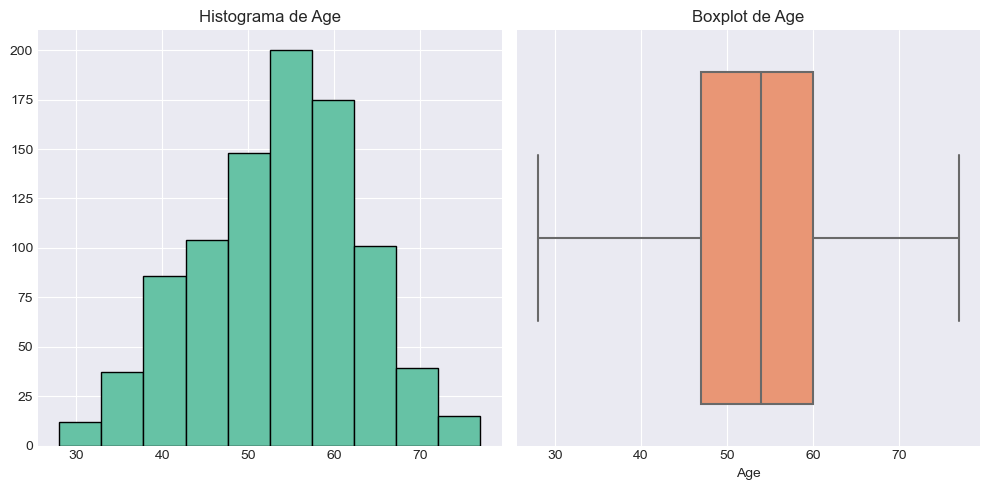


=== RESTINGBP ===
Skew: 0.61
Kurtosis:  0.79
Coeficiente de Variación:  13.58 %


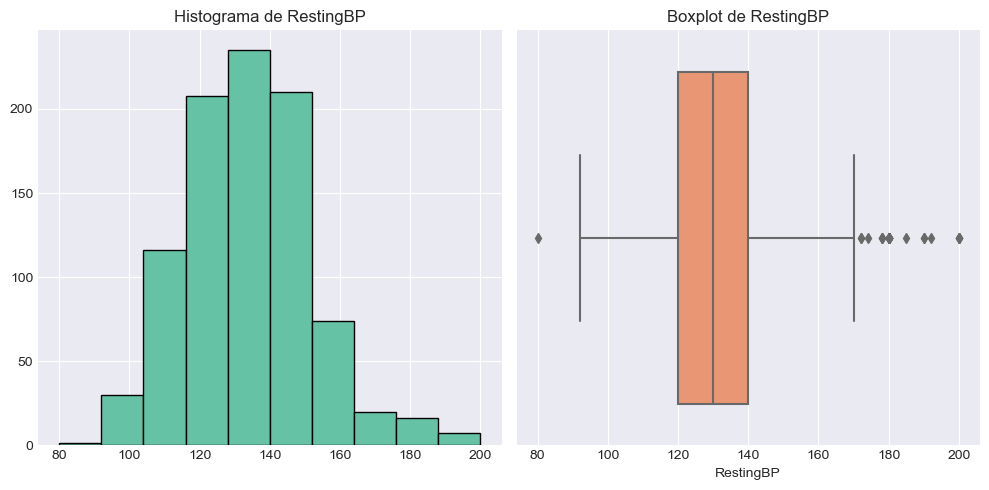


=== CHOLESTEROL ===
Skew: 1.37
Kurtosis:  6.22
Coeficiente de Variación:  21.82 %


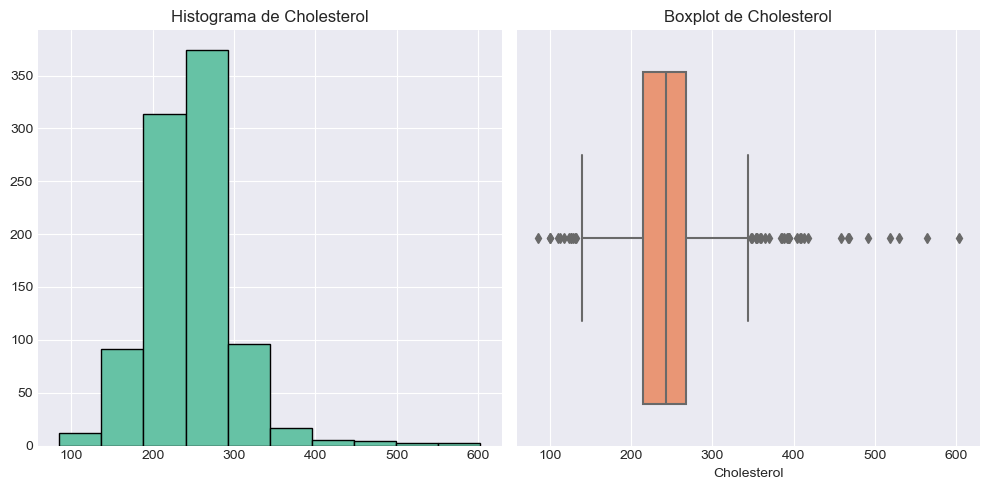


=== MAXHR ===
Skew: -0.14
Kurtosis:  -0.45
Coeficiente de Variación:  18.62 %


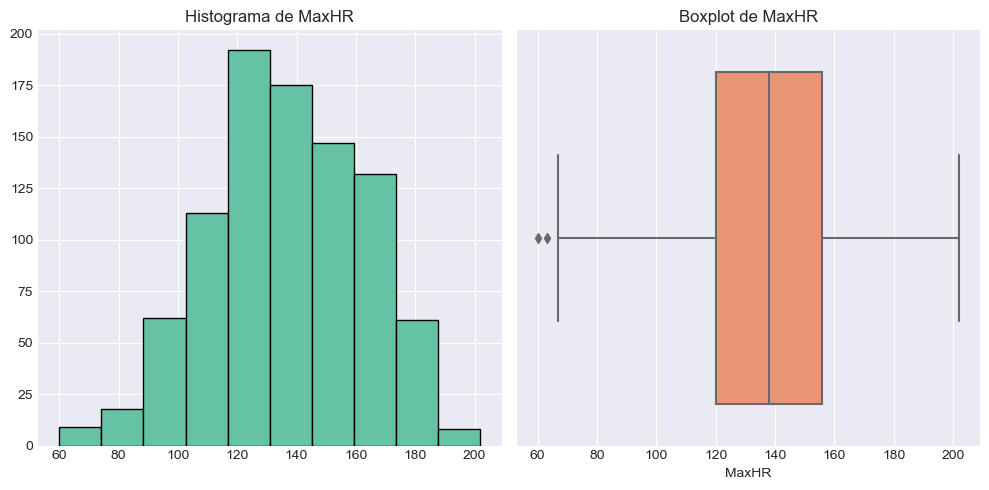


=== OLDPEAK ===
Skew: 1.02
Kurtosis:  1.2
Coeficiente de Variación:  120.33 %


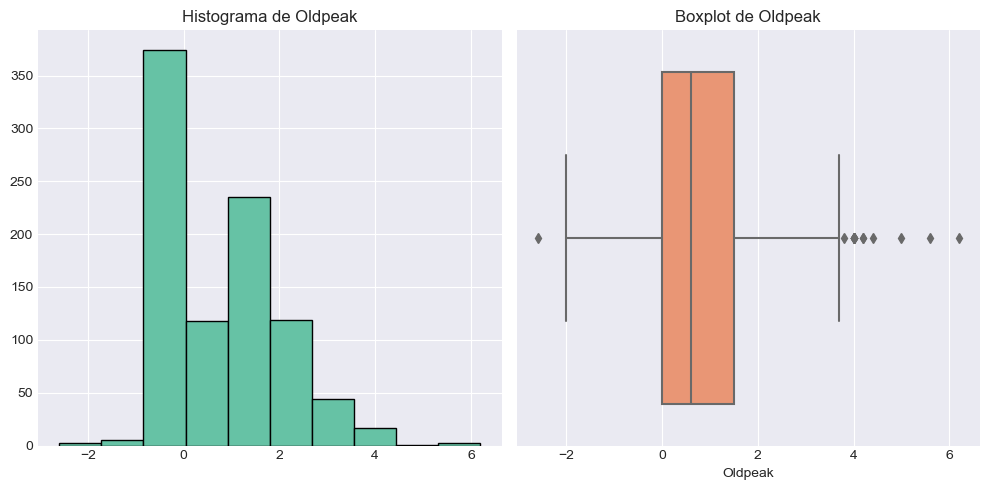

In [78]:
for col in numericas: 
    
    print(f"\n=== {col.upper()} ===")
    
    print('Skew:', round(df[col].skew(), 2))
    print('Kurtosis: ', round(df[col].kurtosis(), 2))
    coef_variacion = (df[col].std() / df[col].mean()) * 100
    print('Coeficiente de Variación: ', round(coef_variacion, 2), '%')
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10, edgecolor="black", color=colors[0])
    plt.title(f'Histograma de {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color=colors[1])
    plt.title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


**1. Age (Edad)**
- **Skew: -0.2** → Distribución **ligeramente asimétrica negativa**. La cola izquierda es más larga, indicando una concentración ligeramente mayor de pacientes en edades más avanzadas, pero la asimetría es mínima (casi simétrica).
- **Kurtosis: -0.39** → Distribución **platicúrtica (más plana)** que la normal. Los datos están menos concentrados alrededor de la media y tienen colas más ligeras.
- **Coeficiente de Variación: 17.64%** → Dispersión **moderada y saludable**. La variabilidad relativa es aceptable para análisis estadísticos.

**2. Cholesterol (Colesterol)**
- **Skew: 1.37** → **Asimetría fuertemente positiva**. Indicando una cola extendida hacia la derecha.
- **Kurtosis: 6.22** → Distribución **extremadamente leptocúrtica (muy picada)**. Los datos están muy concentrados alrededor de la media, sugiriendo posible sobre-ajuste en la imputación.
- **Coeficiente de Variación: 21.82%** → **Dispersión moderada**. Indicando datos homogéneos y consistentes.

**3. MaxHR (Frecuencia Cardíaca Máxima)**
- **Skew: -0.14** → Distribución **casi perfectamente simétrica**.
- **Kurtosis: -0.45** → Ligera **platocurtosis**, indicando una distribución saludable sin valores extremos pronunciados.
- **Coeficiente de Variación: 18.62%** → Dispersión **moderada y consistente**. Se mantiene como una de las variables mejor comportadas del dataset.

**4. Oldpeak (Depresión del ST)**
- **Skew: 1.02** → **Fuertemente asimétrica positiva**. La mayoría de los valores están concentrados en el rango bajo (0-1.5) con una cola hacia valores más altos.
- **Kurtosis: 1.2** → Distribución **leptocúrtica**, con valores más concentrados y presencia de algunos valores extremos positivos.
- **Coeficiente de Variación: 120.33%** → **Dispersión muy alta**. Indica una gran variabilidad relativa en las mediciones de depresión del ST entre pacientes.

**5. RestingBP (Presión Arterial en Reposo)**
- **Skew: 0.61** → Distribución **moderadamente asimétrica positiva**. La cola derecha es más larga, indicando la presencia de algunos valores de presión arterial elevada, pero la asimetría es manejable.
- **Kurtosis: 0.79** → Distribución **levemente leptocúrtica**. Los datos presentan una concentración moderada alrededor de la media con colas ligeramente más pesadas que la distribución normal.
- **Coeficiente de Variación: 13.58%** → **Baja dispersión relativa**. Los valores de presión arterial muestran consistencia y estabilidad, con variabilidad controlada que es típica en mediciones fisiológicas de presión arterial.

#### Análisis de Valores Atípicos

Para la identificación de valores atípicos en las variables númericas, se aplicó el método del rango intercuartílico (IQR). 

In [79]:
for col in numericas:
    
    print(f"\n=== {col.upper()} ===")
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers)/len(df)*100:.2f}%")



=== AGE ===
Número de outliers: 0
Porcentaje de outliers: 0.00%

=== RESTINGBP ===
Número de outliers: 27
Porcentaje de outliers: 2.94%

=== CHOLESTEROL ===
Número de outliers: 41
Porcentaje de outliers: 4.47%

=== MAXHR ===
Número de outliers: 2
Porcentaje de outliers: 0.22%

=== OLDPEAK ===
Número de outliers: 16
Porcentaje de outliers: 1.74%


**1. Age (Edad)**
- **Número de outliers: 0** → **Porcentaje: 0.00%**
- **Interpretación:** La distribución de edad es **extremadamente limpia y consistente**. No se detectan valores atípicos según el criterio IQR.

**2. RestingBP (Presión Arterial en Reposo)**
- **Número de outliers: 27** → **Porcentaje: 2.94%**
- **Interpretación:** Presencia de **outliers moderados**. Probablemente corresponden a pacientes con hipertensión severa (valores muy altos) o hipotensión (valores muy bajos).

**3. Cholesterol (Colesterol)**
- **Número de outliers: 41** → **Porcentaje: 4.47%**
- **Interpretación:** **Cantidad significativa de outliers**, principalmente valores altos. Esto es esperable después de la imputación con MICE y refleja pacientes con hipercolesterolemia real.

**4. MaxHR (Frecuencia Cardíaca Máxima)**
- **Número de outliers: 2** → **Porcentaje: 0.22%**
- **Interpretación:** **Muy pocos outliers**. Posiblemente corresponden a pacientes con frecuencias cardíacas máximas excepcionalmente bajas o altas durante el ejercicio.

**5. Oldpeak (Depresión del ST)**
- **Número de outliers: 16** → **Porcentaje: 1.74%**
- **Interpretación:** Outliers **moderados y esperables**. Corresponden a pacientes con depresión significativa del segmento ST, lo cual es clínicamente relevante para enfermedad cardíaca.


##### Manejo de Valores Atípicos mediante Winsorization

Para mitigar el impacto de valores extremos en las variables numéricas identificadas previamente en el análisis de outliers, se aplicó la técnica de winsorization. Este método preserva los casos atípicos reemplazando los valores en los percentiles extremos superior e inferior por los valores en un límite especificado, reduciendo así la distorsión en los modelos sin eliminar registros valiosos. Los límites se establecieron equilibrando la retención de información clínicamente relevante con la estabilidad estadística del modelo.

In [80]:
df['RestingBP'] = winsorize(df['RestingBP'], limits=[0.02, 0.02])  
df['Cholesterol'] = winsorize(df['Cholesterol'], limits=[0.04, 0.04]) 
df['Oldpeak'] = winsorize(df['Oldpeak'], limits=[0.01, 0.01])

Se verifican los cambios realizados.

In [81]:
atipicos =["RestingBP","Cholesterol","Oldpeak"]
df[atipicos].describe()

,RestingBP,Cholesterol,Oldpeak
count,917.000000,917.000000,917.000000
mean,132.496183,243.080629,0.888332
std,17.422543,43.281662,1.029460
min,100.000000,164.000000,-0.500000
25%,120.000000,214.000000,0.000000
50%,130.000000,242.824123,0.600000
75%,140.000000,267.000000,1.500000
max,180.000000,340.000000,4.000000


**1. `RestingBP` (Presión arterial en reposo)**
- **Mínimo:** Aumentó de **80** a **100** mm Hg.
- **Máximo:** Disminuyó de **200** a **180** mm Hg.
- **Desviación estándar:** Reducción leve de **17.99** a **17.42**.
- **Interpretación:** La winsorización recortó valores en ambos extremos de la distribución. El nuevo mínimo (100 mm Hg) corrige valores de hipotensión extrema, mientras el nuevo máximo (180 mm Hg) limita casos de hipertensión severa. La distribución mantiene su variabilidad clínicamente relevante pero es más robusta para modelado.

**2. `Cholesterol` (Colesterol sérico)**
- **Mínimo:** Aumentó significativamente de **85** a **164** mg/dl.
- **Máximo:** Disminuyó drásticamente de **603** a **340** mg/dl.
- **Desviación estándar:** Reducción notable de **53.38** a **43.28**.
- **Interpretación:** La winsorización controló efectivamente los valores extremos, especialmente los superiores (hipercolesterolemia severa >340 mg/dl). Esto reduce el sesgo positivo extremo de la variable, creando una distribución más compacta y manejable para modelos sensibles a outliers, mientras preserva el rango clínicamente significativo de colesterol elevado.

**3. `Oldpeak` (Depresión del segmento ST)**
- **Mínimo:** Aumentó de **-2.6** a **-0.5**.
- **Máximo:** Reducción significativa de **6.2** a **4.0**.
- **Desviación estándar:** Leve disminución de **1.07** a **1.03**.
- **Interpretación:** Los valores extremos de depresión severa del segmento ST (>4.0) fueron ajustados al límite superior winsorizado. Esto es clínicamente apropiado, ya que valores superiores a 4.0 mm representan anomalías electrocardiográficas graves y su reducción controla su influencia desproporcionada en el modelo, manteniendo su valor predictivo crítico dentro de rangos clínicamente relevantes.

#### Verificación Visual del Efecto de la Winsorization

Para evaluar visualmente el impacto de la winsorization en la distribución y dispersión de las variables tratadas (`RestingBP`, `Cholesterol`, `Oldpeak`), se generaron histogramas y diagramas de caja (boxplots). Estas visualizaciones permiten contrastar las distribuciones antes y después del tratamiento, confirmando la reducción de valores extremos mientras se mantiene la estructura central de los datos, asegurando así la preparación adecuada para el modelado. Además se evalua nuevamente:

- **Asimetría**:
    - `skew = 0`: Distribución simétrica (valores aceptables skew $\in (-1,1)$).
    - `skew > 0`: Mayor peso en la cola izquierda de la distribución (sesgo positivo).
    - `skew < 0`: Mayor peso en la cola derecha de la distribución (sesgo negativo).

- **Kurtosis**: Determina si una distribución tiene colas gruesas con respecto a la distribución normal. Proporciona información sobre la forma de una distribución de frecuencias.
    - `kurtosis = 3`: se denomina mesocúrtica (distribución normal).
    - `kurtosis < 3`: se denomina platicúrtica (distribución con colas menos gruesas que la normal).
    - `kurtosis > 3`: se denomina leptocúrtica (distribución con colas más gruesas que la normal) y significa que trata de producir más valores atípicos que la distribución normal.

- **Coeficiente de Variación**: Es una medida estadística que se utiliza para evaluar la variabilidad relativa de una muestra en relación con su media. Se calcula como la desviación estándar de los datos dividida por la media, y se expresa como un porcentaje multiplicado por 100 para facilitar su interpretación.

Para el número de Bins se utiliza la **Regla de Rice**.


=== RESTINGBP ===
Skew: 0.51
Kurtosis:  0.13
Coeficiente de Variación:  13.15 %


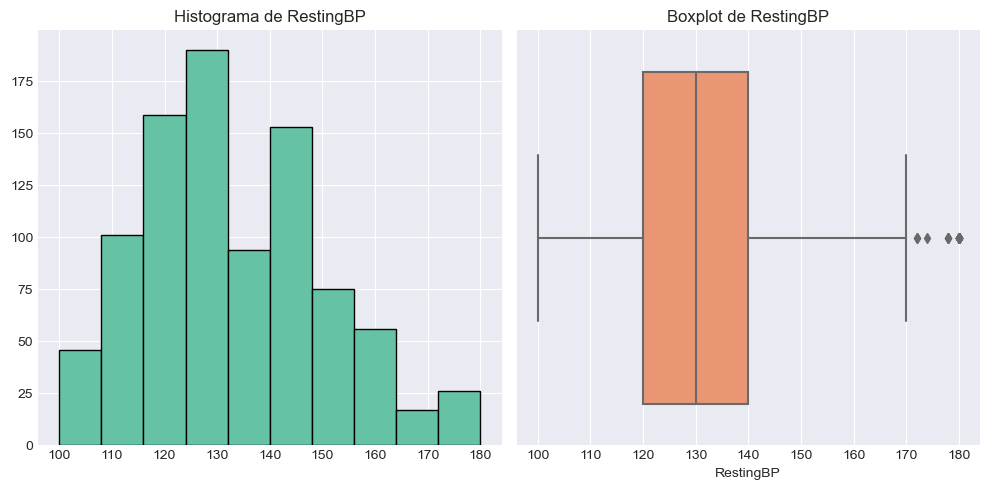


=== CHOLESTEROL ===
Skew: 0.32
Kurtosis:  -0.19
Coeficiente de Variación:  17.81 %


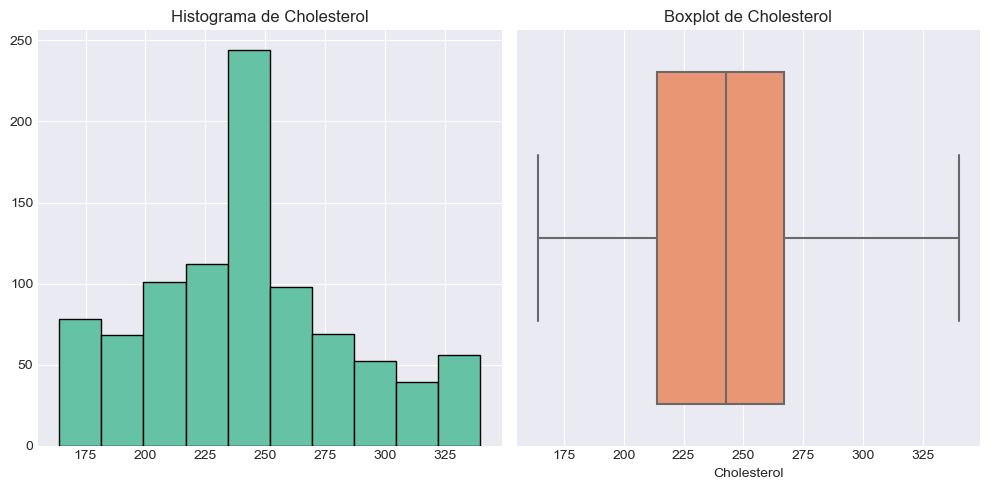


=== OLDPEAK ===
Skew: 0.97
Kurtosis:  0.19
Coeficiente de Variación:  115.89 %


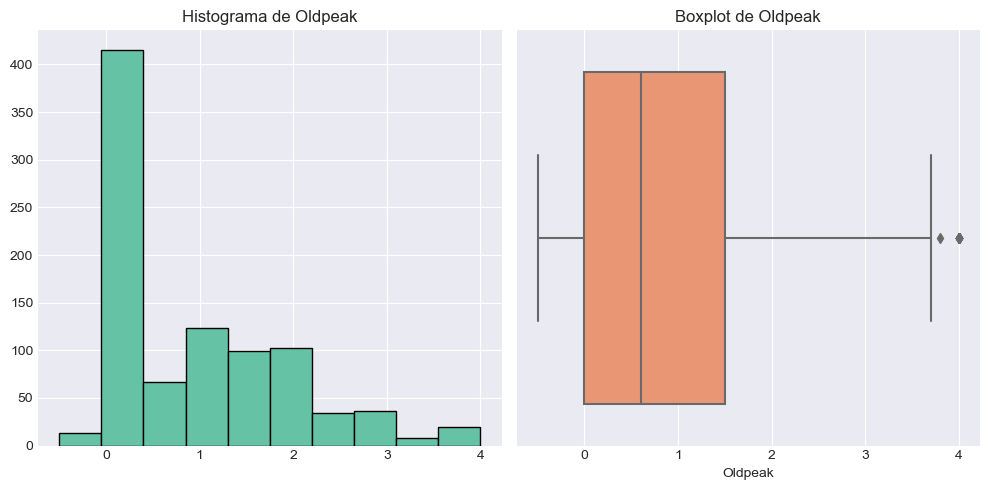

In [82]:
for col in atipicos: 
    
    print(f"\n=== {col.upper()} ===")
    
    print('Skew:', round(df[col].skew(), 2))
    print('Kurtosis: ', round(df[col].kurtosis(), 2))
    coef_variacion = (df[col].std() / df[col].mean()) * 100
    print('Coeficiente de Variación: ', round(coef_variacion, 2), '%')
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10, edgecolor="black", color=colors[0])
    plt.title(f'Histograma de {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color=colors[1])
    plt.title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()

**1. `RestingBP` (Presión arterial en reposo)**
- **Skewness (0.51):** El sesgo se redujo levemente (de 0.61 a 0.51), indicando una distribución más simétrica. La winsorización equilibró efectivamente la influencia de valores extremos en ambos extremos de la distribución.
- **Kurtosis (0.13):** La curtosis disminuyó moderadamente (de  0.79 a 0.13), acercándose a una distribución mesocúrtica. Esto refleja una reducción en la concentración de valores extremos y una distribución más normal.
- **Coeficiente de Variación (13.15%):** La dispersión relativa disminuyó (de  13.58 % a 13.15%), confirmando que la variable es más estable y consistente después del tratamiento, manteniendo su variabilidad clínicamente relevante.

**2. `Cholesterol` (Colesterol sérico)**
- **Skewness (0.32):** El sesgo se redujo drásticamente (de 1.37 a 0.32), indicando una distribución mucho más simétrica. La winsorización corrigió eficientemente la asimetría positiva extrema causada por los valores de hipercolesterolemia severa.
- **Kurtosis (-0.19):** La curtosis disminuyó notablemente (de 6.22 a -0.19), transformando la distribución de extremadamente leptocúrtica a ligeramente platicúrtica. Esto refleja una eliminación completa de los valores atípicos que causaban el exceso de curtosis.
- **Coeficiente de Variación (17.81%):** La dispersión relativa se redujo significativamente (de 21.82% a 17.81%), indicando que la variabilidad de los datos es ahora más homogénea y menos influenciada por outliers extremos.

**3. `Oldpeak` (Depresión del segmento ST)**
- **Skewness (0.97):** El sesgo disminuyó levemente (de 1.02 a 0.97), pero sigue siendo moderadamente positivo. Esto era esperado debido a la naturaleza inherentemente sesgada de esta variable clínica, donde la mayoría de los pacientes presentan depresiones leves o nulas del ST.
- **Kurtosis (0.19):** La curtosis se redujo (de 1.20 a 0.19), acercándose a una distribución mesocúrtica. Esto indica que los valores extremos superiores fueron controlados efectivamente.
- **Coeficiente de Variación (115.89%):** La dispersión relativa disminuyó ligeramente (de 120.33% a 115.89%), pero sigue siendo muy alta. Esto confirma que `Oldpeak` mantiene su alta variabilidad inherente, característica de las mediciones de depresión del segmento ST en población con sospecha de enfermedad cardíaca.


## Análisis Bivariado

El análisis bivariado es la segunda fase del análisis exploratorio de datos. Se enfoca en las relaciones entre dos variables para obtener datos estadísticos sobre sus influencias mutuas.

### Variables Binarias vs HeartDisease

Se generan graficos de barras para analizar la relación entre un conjunto de variables binarias y la presencia de enfermedad cardíaca con el fin de identificar qué variables binarias están asociadas a mayores proporciones de diagnóstico positivos en el conjunto de datos.

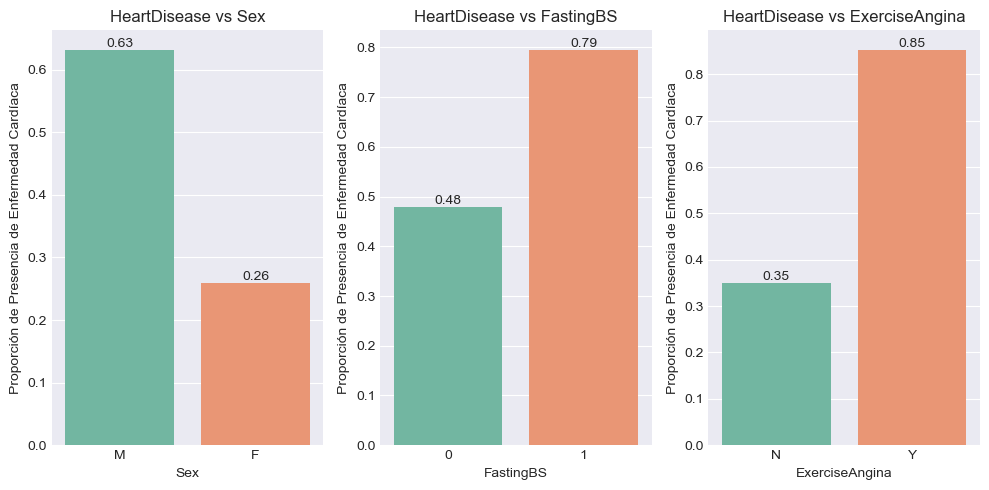

In [83]:
plt.figure(figsize=(10, 5)) 

for i, col in enumerate(binarias, 1):  
    if col != "HeartDisease":
        plt.subplot(1, 3, i) 
        ax = sns.barplot(
        x=col, 
        y='HeartDisease', 
        data=df, 
        palette='Set2',
        errorbar=None
        )
        plt.title(f'HeartDisease vs {col}')
        plt.ylabel('Proporción de Presencia de Enfermedad Cardíaca')
        
        for container in ax.containers:
            ax.bar_label(container, fmt="%.2f")  
            
plt.tight_layout()  
plt.show()

**1. HeartDisease vs Sex (Enfermedad Cardíaca vs Sexo)**
*   **Relación:** **Fuerte correlación con claro dimorfismo sexual**. La prevalencia de enfermedad cardíaca es significativamente mayor en hombres.
*   **Hallazgos Clave:**
    *   **Masculino (M): 63%** - Casi dos tercios de los pacientes hombres en el dataset tienen enfermedad cardíaca.
    *   **Femenino (F): 26%** - Solo una cuarta parte de las mujeres presentan la enfermedad.
*   **Implicación para el Modelo:** El **sexo masculino es un factor de riesgo mayor** en este dataset. La variable `Sex` será un predictor importante, pero es crucial recordar el desbalance en la muestra (79% hombres vs 21% mujeres). El modelo podría tener un mejor rendimiento predictivo en hombres debido a esta sobrerrepresentación.

**2. HeartDisease vs FastingBS (Enfermedad Cardíaca vs Glucemia en Ayunas)**
*   **Relación:** **Correlación moderadamente fuerte**. La glucemia elevada está asociada con una mayor prevalencia de enfermedad cardíaca.
*   **Hallazgos Clave:**
    *   **FastingBS > 120 mg/dl (1): 79%** - Aproximadamente dos de cada tres pacientes con glucemia elevada tienen enfermedad cardíaca.
    *   **FastingBS ≤ 120 mg/dl (0): 48%** - Aproximadamente la mitad de los pacientes con glucemia normal también presentan la enfermedad.
*   **Implicación para el Modelo:** La diabetes o prediabetes (`FastingBS = 1`) es un **factor de riesgo claro**, elevando la probabilidad de enfermedad cardíaca en un 31% en comparación con los pacientes con glucemia normal. Será un predictor útil, aunque no tan determinante como otras variables.

**3. HeartDisease vs ExerciseAngina (Enfermedad Cardíaca vs Angina Inducida por Ejercicio)**
*   **Relación:** **Correlación extremadamente fuerte**. La presencia de angina durante el ejercicio es un indicador poderoso de enfermedad cardíaca.
*   **Hallazgos Clave:**
    *   **ExerciseAngina = Sí (Y): 85%** - La gran mayoría de los pacientes que reportan angina durante la prueba de esfuerzo tienen enfermedad cardíaca.
    *   **ExerciseAngina = No (N): 35%** - Solo alrededor de un tercio de los que no la reportan están enfermos.
*   **Implicación para el Modelo:** `ExerciseAngina` es, junto con `ST_Slope`, uno de los **predictores más poderosos** del dataset. La capacidad del modelo para identificar correctamente a los pacientes que experimentan angina con el ejercicio será fundamental para su precisión general.

**Conclusión General y Orden de Importancia Predictiva**:

Basado en este análisis bivariado, **el poder predictivo** de estas variables binarias, de mayor a menor, es:

1. **`ExerciseAngina`**: Discriminador excepcional. La presencia de angina durante la prueba de esfuerzo es un signo de alarma mayor.
2. **`Sex`**: Predictor muy fuerte, mostrando una disparidad muy marcada en la prevalencia de la enfermedad entre hombres y mujeres en esta cohorte.
3. **`FastingBS`**: Predictor moderado, pero clínicamente relevante, que refuerza la conocida asociación entre la disglucemia y la enfermedad cardiovascular.  

**En resumen, el perfil de mayor riesgo en este dataset es: Hombre, con glucemia elevada, que desarrolla angina durante la prueba de esfuerzo**


### Variables Categóricas vs HeartDisease

Se generan graficos de barras para analizar la relación entre variables categóricas y la presencia de enfermedad cardíaca en la población estudiada. Con el fin de identificar qué categorías dentro de cada variable presentan mayores proporciones de diagnósticos positivos, lo que podría indicar posibles factores de riesgo asociados.


=== CHESTPAINTYPE ===


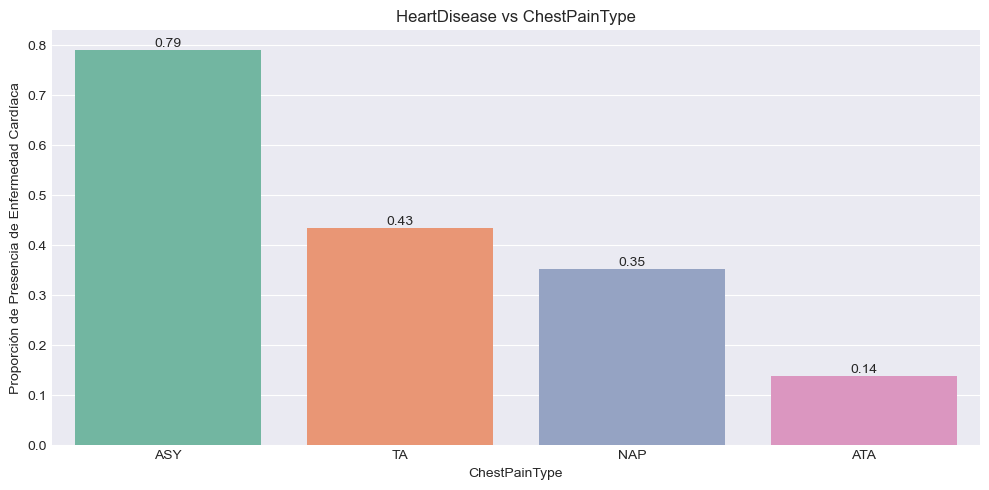


=== RESTINGECG ===


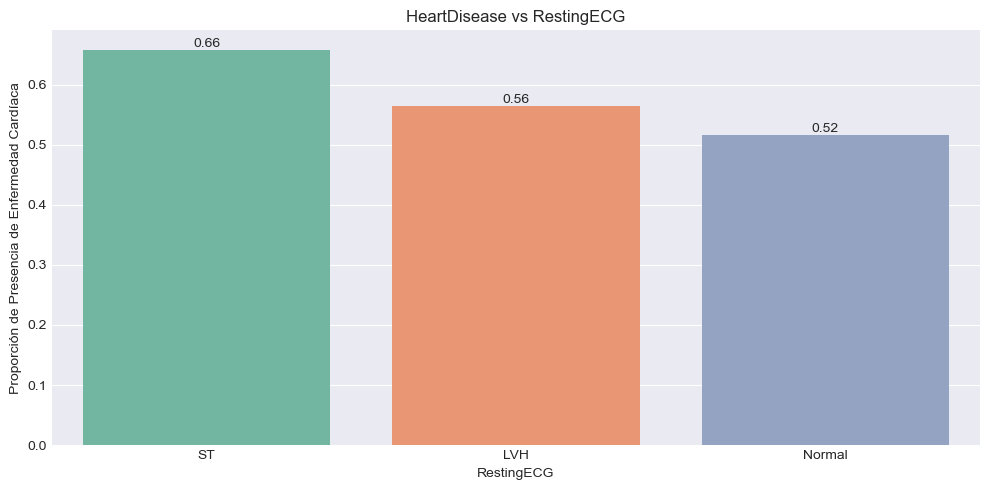


=== ST_SLOPE ===


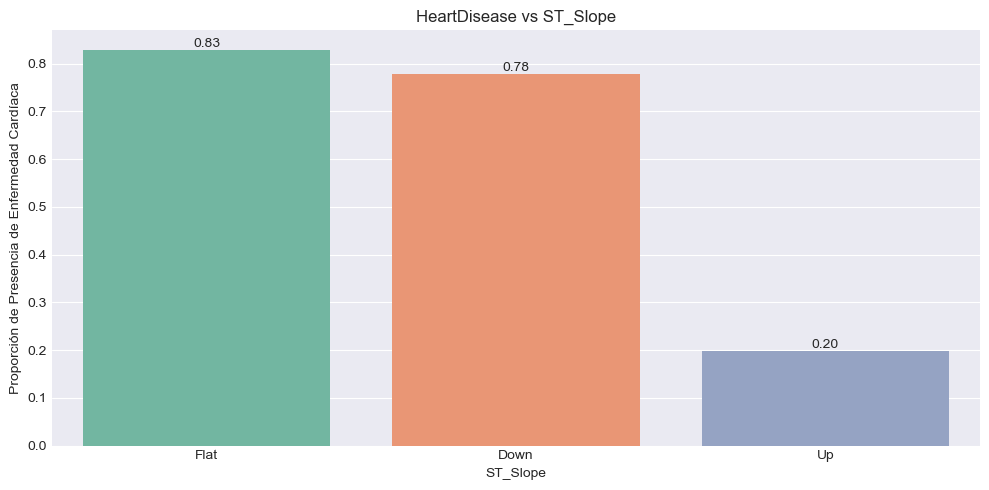

In [84]:
for col in categoricas:
    
    print(f"\n=== {col.upper()} ===")
    plt.figure(figsize=(10, 5))
    
    order = (
        df.groupby(col)['HeartDisease']
        .mean()
        .sort_values(ascending=False)
        .index
    )
    
    ax = sns.barplot(
        x=col, 
        y='HeartDisease', 
        data=df, 
        palette='Set2',
        errorbar=None,
        order=order
    )

    plt.title(f'HeartDisease vs {col}')
    plt.ylabel('Proporción de Presencia de Enfermedad Cardíaca')
    
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f")
          
    plt.tight_layout()
    plt.show()

**1. HeartDisease vs ChestPainType (Enfermedad Cardíaca vs Tipo de Dolor Torácico)**
*   **Relación:** **Fuerte correlación**. La presencia de enfermedad cardíaca varía drásticamente según el tipo de dolor torácico.
*   **Hallazgos Clave:**
    *   **ASY (Asintomático): 79%** - La gran mayoría de pacientes **asintomáticos** tienen enfermedad cardíaca. Este es el hallazgo más crítico, ya que resalta la naturaleza "silenciosa" de la condición en esta población.
    *   **TA (Angina Típica): 43%** - Menos de la mitad de los pacientes con el dolor clásicamente asociado a problemas coronarios tienen la enfermedad.
    *   **ATA (Angina Atípica): 14%** y **NAP (Dolor No Anginoso): 35%** - Presentan las proporciones más bajas de enfermedad.
*   **Implicación para el Modelo:** La variable `ChestPainType` será un **predictor extremadamente poderoso**. El valor `ASY` es, de forma contraintuitiva, el indicador de riesgo más alto. Esto sugiere que el modelo aprenderá que la ausencia de síntomas típicos en este contexto específico es una señal de alarma.

**2. HeartDisease vs RestingECG (Enfermedad Cardíaca vs Electrocardiograma en Reposo)**
*   **Relación:** **Correlación moderada a débil**. Las anomalías en el ECG en reposo muestran una prevalencia de enfermedad solo ligeramente mayor.
*   **Hallazgos Clave:**
    *   **ST (Anomalía ST-T): 66%** - La anomalía más específica para isquemia muestra la mayor proporción de enfermedad.
    *   **LVH (Hipertrofia Ventricular Izquierda): 56%** - Un marcador de esfuerzo cardíaco crónico también está asociado a una mayor prevalencia.
    *   **Normal: 52%** - Sorprendentemente, más de la mitad de los pacientes con un ECG en reposo normal tienen enfermedad cardíaca.
*   **Implicación para el Modelo:** Un ECG en reposo **normal no descarta** la enfermedad. Si bien las anomalías (ST y LVH) aumentan la probabilidad, la discriminación no es perfecta. Esta variable probablemente tendrá una **importancia moderada** en el modelo, complementando a predictores más fuertes.

**3. HeartDisease vs ST_Slope (Enfermedad Cardíaca vs Pendiente del ST en Ejercicio)**
*   **Relación:** **Correlación extremadamente fuerte y clínicamente esperada**. Esta es probablemente la variable predictiva individual más importante.
*   **Hallazgos Clave:**
    *   **Down (Descendente): 78%** - Casi todos los pacientes con esta anomalía severa tienen enfermedad cardíaca.
    *   **Flat (Plana): 83%** - La pendiente plana, un marcador de isquemia, tiene una asociación muy alta con la enfermedad.
    *   **Up (Ascendente): 20%** - Solo 1 de cada 5 pacientes con una respuesta normal a la prueba de esfuerzo tiene la enfermedad.
*   **Implicación para el Modelo:** `ST_Slope` será un **predictor de primera clase**. El modelo dependerá en gran medida de esta variable para distinguir entre pacientes sanos y enfermos. La separación casi perfecta entre "Up" (mayormente sano) y "Flat/Down" (mayormente enfermo) la convierte en una característica fundamental.

**Conclusión General y Orden de Importancia Predictiva**  

Basado en el análisis bivariado, el poder predictivo de estas variables categóricas, de mayor a menor, es:

1. **`ST_Slope`**: Discriminador casi perfecto. La variable categórica más importante.
2. **`ChestPainType`**: Predictor muy fuerte, especialmente por el alto riesgo asociado a ser asintomático (ASY).
3. **`RestingECG`**: Predictor más débil, pero aún valioso, especialmente el hallazgo de anomalías en la onda ST-T.  

**Este análisis confirma que las pruebas de esfuerzo (`ST_Slope`) y la presentación clínica atípica (`ChestPainType = ASY`) son los factores clave que el modelo utilizará para predecir la enfermedad cardíaca en este dataset.**

### Variables Númericas vs HeartDisease

Con el objetivo de identificar la relación entre las variables numéricas predictoras y la variable objetivo (`HeartDisease`), se genera una serie de diagramas de caja (boxplots). Esta visualización permite comparar la distribución (mediana, rango intercuartílico) de cada variable numérica segmentada por la clase de diagnóstico, facilitando la observación de diferencias significativas entre los grupos que podrían ser patrones predictivos clave.


=== AGE ===


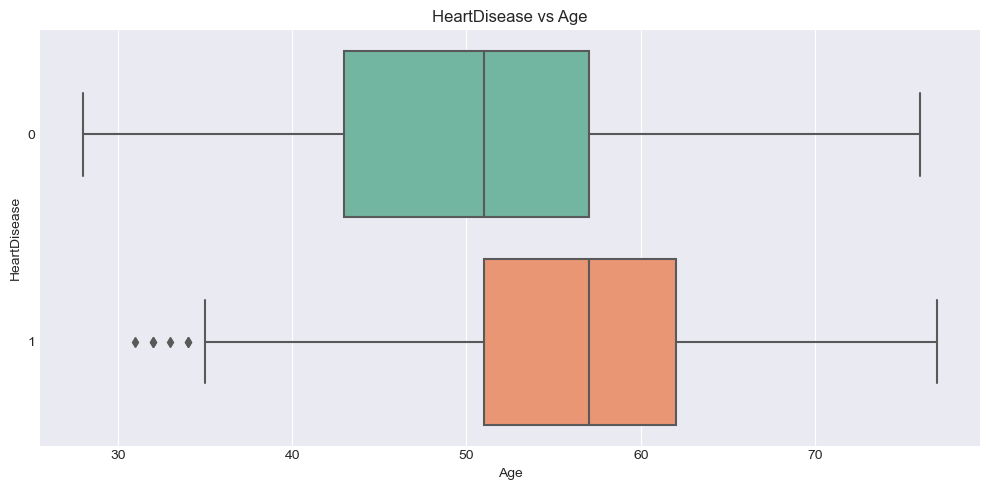


=== RESTINGBP ===


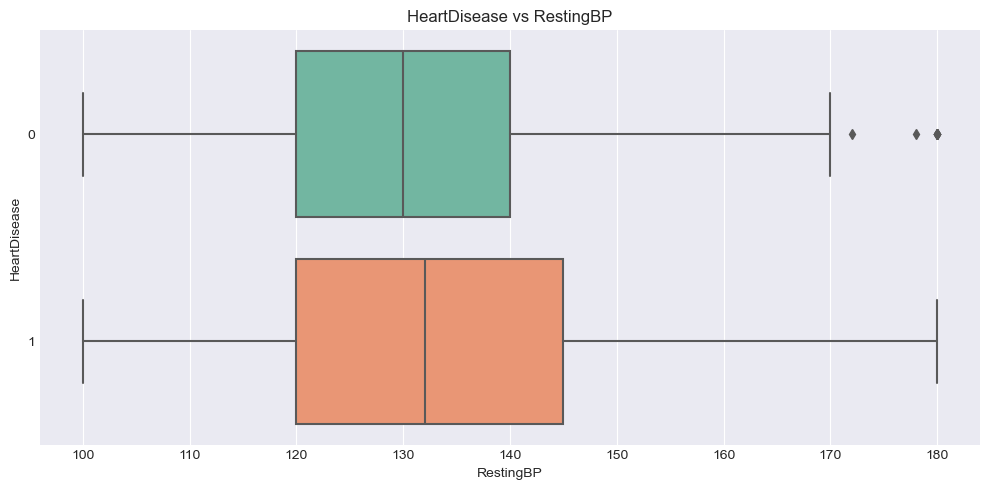


=== CHOLESTEROL ===


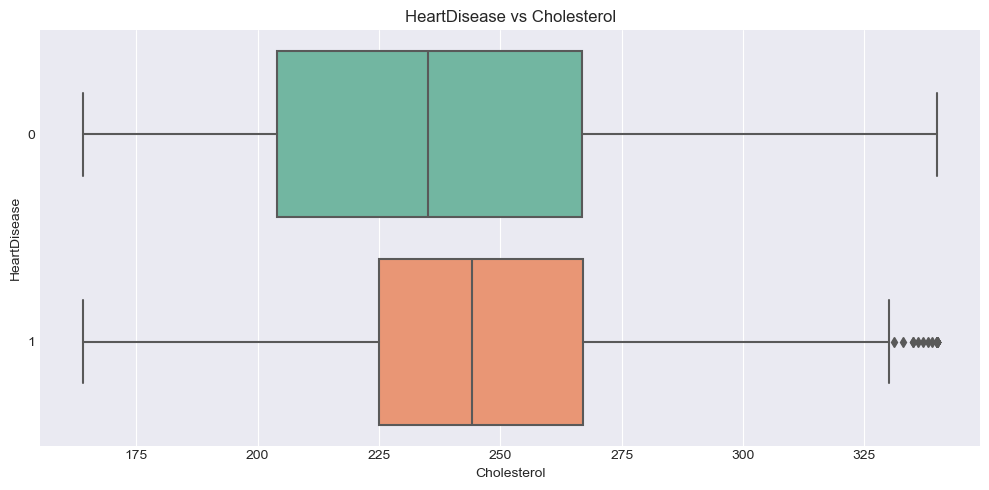


=== MAXHR ===


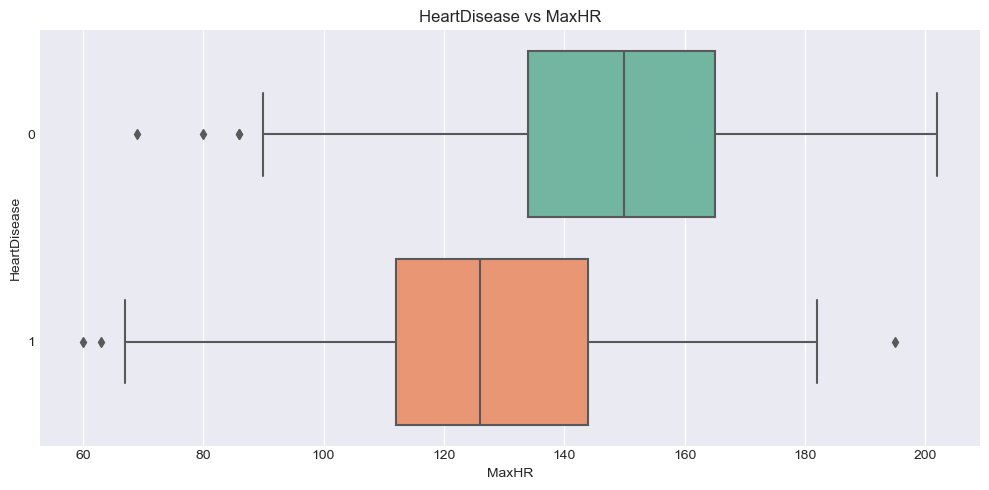


=== OLDPEAK ===


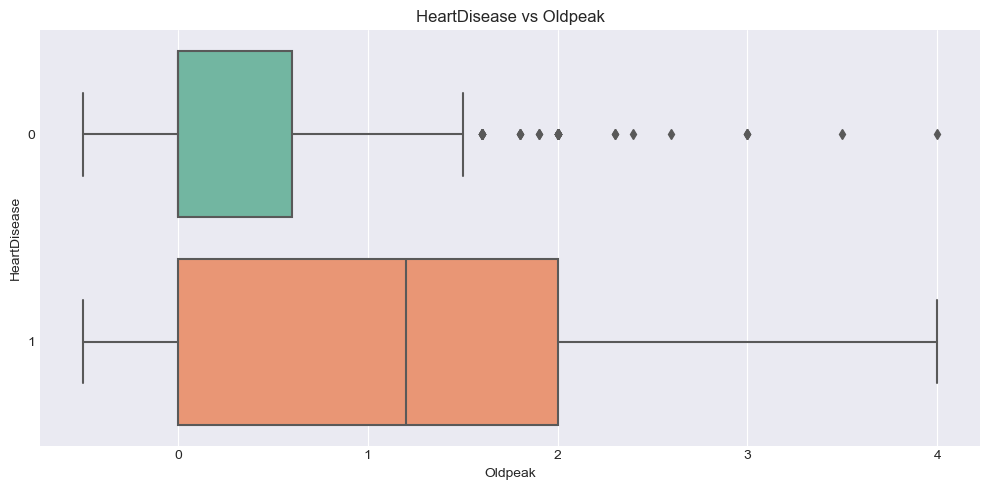

In [85]:
for col in numericas:
    print(f"\n=== {col.upper()} ===")
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        x=col,          
        y='HeartDisease',        
        data=df, 
        palette='Set2', 
        orient='h'      
    )
    plt.title(f'HeartDisease vs {col}') 
    plt.tight_layout()
    plt.show()

**1. HeartDisease vs Age (Enfermedad Cardíaca vs Edad)**
*   **Relación:** **Correlación positiva moderada**. Se observa una tendencia clara donde la prevalencia de enfermedad cardíaca aumenta con la edad.
*   **Hallazgos Clave:**
    *   **Pacientes jóvenes (<45 años):** Baja densidad de puntos rojos (enfermedad), predominando los verdes (sanos).
    *   **Pacientes de mediana edad (45-60 años):** Mezcla más equilibrada entre ambos grupos.
    *   **Pacientes mayores (>60 años):** Clara predominancia de puntos rojos (enfermos).
*   **Implicación para el Modelo:** La `Age` será un **predictor consistente y confiable**. El modelo aprenderá que el riesgo aumenta progresivamente con la edad, lo cual es epidemiológicamente correcto.

**2. HeartDisease vs RestingBP (Enfermedad Cardíaca vs Presión Arterial en Reposo)**
*   **Relación:** **Correlación muy débil o nula**. La distribución de puntos rojos y verdes es bastante uniforme a lo largo de todo el rango de presión arterial.
*   **Hallazgos Clave:**
    *   No se aprecia una concentración clara de casos de enfermedad en los valores altos de presión arterial.
    *   Hay muchos pacientes con presión arterial normal (verdes alrededor de 120-130 mmHg) y también muchos con hipertensión (rojos por encima de 140 mmHg).
*   **Implicación para el Modelo:** `RestingBP` probablemente tendrá una **baja importancia relativa** en el modelo predictivo final. Por sí sola, no es un buen discriminador.

**3. HeartDisease vs Cholesterol (Enfermedad Cardíaca vs Colesterol)**
*   **Relación:** **Correlación positiva débil a moderada**. Existe una ligera tendencia donde los niveles más altos de colesterol se asocian con más casos de enfermedad cardíaca.
*   **Hallazgos Clave:**
    *   En el rango bajo de colesterol (175-225 mg/dl) hay una mezcla de pacientes sanos y enfermos.
    *   A medida que el colesterol aumenta (especialmente por encima de ~250 mg/dl), la densidad de puntos rojos (enfermos) parece incrementarse.
*   **Implicación para el Modelo:** `Cholesterol` aportará información al modelo, pero no será uno de los predictores principales. Su poder predictivo es limitado de forma aislada.

**4. HeartDisease vs MaxHR (Enfermedad Cardíaca vs Frecuencia Cardíaca Máxima)**
*   **Relación:** **Correlación negativa fuerte y clara**. Esta es una de las relaciones más evidentes entre las variables numéricas.
*   **Hallazgos Clave:**
    *   **Alta MaxHR (>150 bpm):** Predominio absoluto de puntos verdes (sanos).
    *   **Baja MaxHR (<120 bpm):** Predominio absoluto de puntos rojos (enfermos).
    *   Existe un punto de separación alrededor de los 130-140 bpm donde la proporción se invierte.
*   **Implicación para el Modelo:** `MaxHR` será un **predictor de primera clase**, extremadamente poderoso. La incapacidad para alcanzar una frecuencia cardíaca alta durante el ejercicio es un fuerte indicador de enfermedad coronaria subyacente.

**5. HeartDisease vs Oldpeak (Depresión del ST)**
*   **Relación:** **Correlación positiva muy fuerte**. La relación es casi lineal: a mayor depresión del ST, mayor probabilidad de enfermedad.
*   **Hallazgos Clave:**
    *   **Oldpeak = 0:** Predominan los puntos verdes (sanos).
    *   **Oldpeak > 1:** Predominan abrumadoramente los puntos rojos (enfermos).
    *   Casi no hay puntos verdes para valores de Oldpeak superiores a 2.
*   **Implicación para el Modelo:** `Oldpeak` es, junto con `MaxHR` y `ST_Slope`, uno de los **predictores numéricos más importantes**. Será una variable fundamental para que el modelo identifique a los pacientes con isquemia miocárdica inducible.

**Conclusión General y Orden de Importancia Predictiva**

Basado en el análisis visual bivariado, el **poder predictivo** de estas variables numéricas, de mayor a menor, es:

1.  **`Oldpeak`**: Relación casi determinista con la enfermedad para valores altos.
2.  **`MaxHR`**: Fuerte discriminador, con una correlación negativa muy clara.
3.  **`Age`**: Predictor consistente con una tendencia positiva evidente.
4.  **`Cholesterol`**: Predictor débil, con una tendencia positiva leve.
5.  **`RestingBP`**: Predictor muy débil o nulo en este análisis visual.

**En resumen, las variables derivadas de la prueba de esfuerzo (`Oldpeak` y `MaxHR`) son, con diferencia, los predictores numéricos más potentes para la enfermedad cardíaca en este dataset.**

---

Para comprender la distribución y la solapación de cada variable numérica entre los pacientes sanos y aquellos con diagnóstico positivo, se generaron histogramas comparativos. Estos gráficos permiten visualizar diferencias en la forma de la distribución, tendencias centrales y dispersión entre las dos clases, lo que ayuda a identificar qué variables tienen un mayor poder discriminatorio.


=== AGE ===


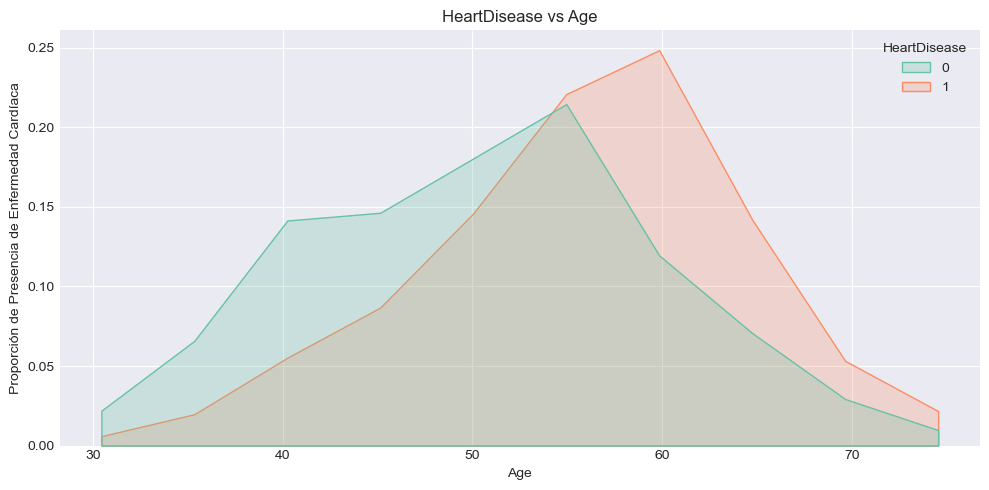


=== RESTINGBP ===


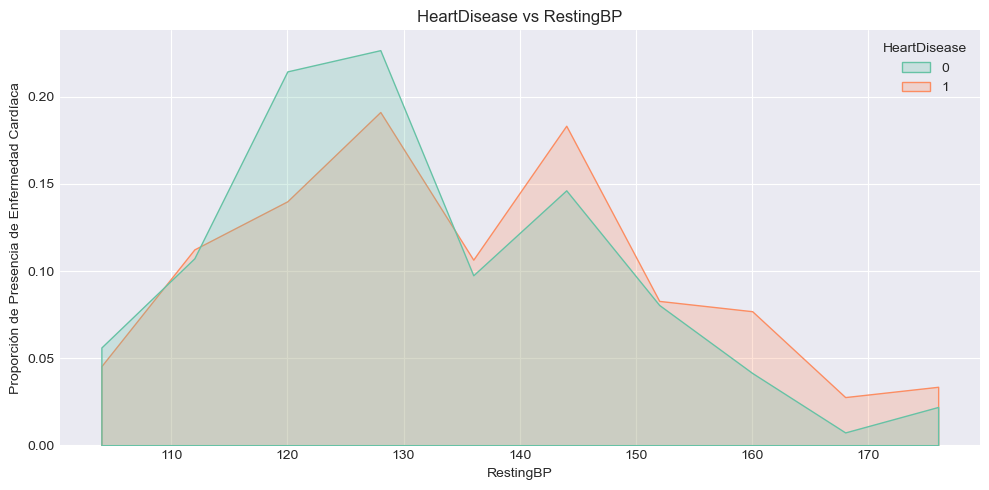


=== CHOLESTEROL ===


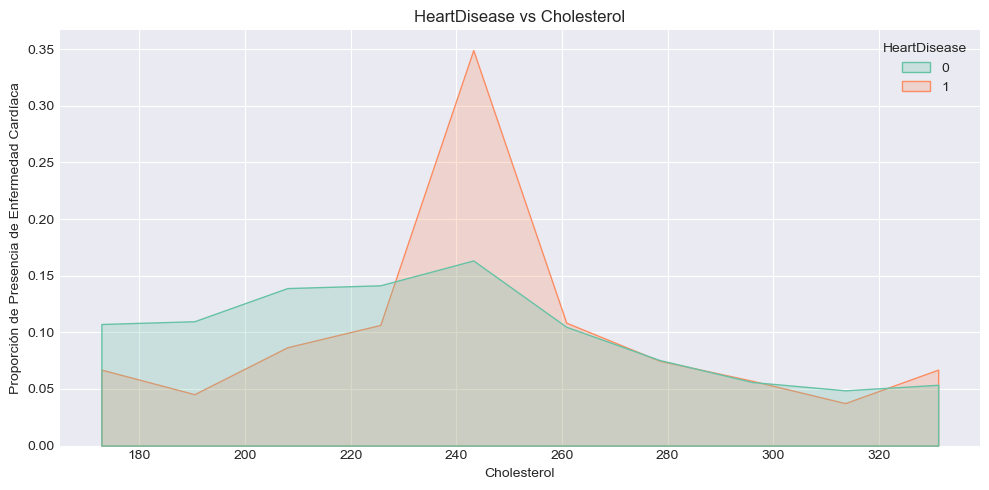


=== MAXHR ===


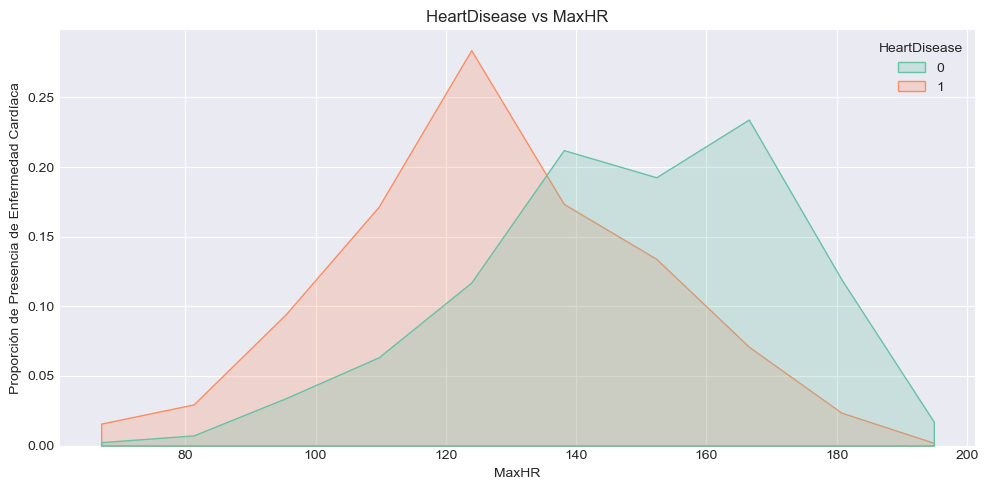


=== OLDPEAK ===


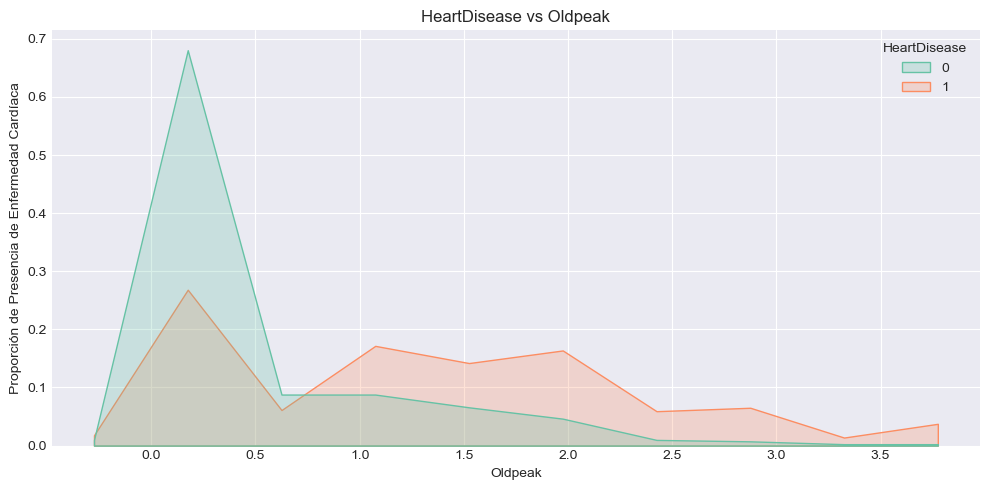

In [86]:
for col in numericas:
    print(f"\n=== {col.upper()} ===")
    plt.figure(figsize=(10, 5))

    sns.histplot(
        data=df,
        x=col,
        hue="HeartDisease",    
        stat="probability",    
        bins=10,
        palette="Set2",
        element="poly",        
        common_norm=False      
    )

    plt.title(f'HeartDisease vs {col}')
    plt.xlabel(col)
    plt.ylabel('Proporción de Presencia de Enfermedad Cardíaca')

    plt.tight_layout()
    plt.show()


**1. Age (Edad) según HeartDisease**
*   **Relación:** **Diferencias claras en la distribución por edad**.
*   **Hallazgos Clave:**
    *   **Sin Enfermedad (0):** La distribución es más joven, con su pico alrededor de los 50-55 años.
    *   **Con Enfermedad (1):** La distribución se desplaza hacia la derecha, con un pico alrededor de los 55-60 años y una cola más larga hacia edades avanzadas.
*   **Implicación para el Modelo:** La edad es un **factor de riesgo consistente**. El modelo aprenderá que los pacientes mayores tienen mayor probabilidad de enfermedad cardíaca.

**2. RestingBP (Presión Arterial en Reposo) según HeartDisease**
*   **Relación:** **Distribuciones muy similares, diferencia mínima**.
*   **Hallazgos Clave:**
    *   Ambas distribuciones (con y sin enfermedad) son casi superpuestas.
    *   No se aprecia un desplazamiento claro ni diferencias significativas en la forma de las distribuciones.
*   **Implicación para el Modelo:** `RestingBP` por sí sola tendrá un **poder discriminatorio muy bajo**. Probablemente será una de las variables menos importantes en el modelo predictivo.

**3. Cholesterol (Colesterol) según HeartDisease**
*   **Relación:** **Diferencias moderadas en la distribución**.
*   **Hallazgos Clave:**
    *   **Sin Enfermedad (0):** Distribución ligeramente desplazada hacia la izquierda, con mayor densidad en valores alrededor de 220-240 mg/dl.
    *   **Con Enfermedad (1):** Distribución más plana y extendida hacia la derecha, con mayor frecuencia relativa en valores superiores a 240 mg/dl.
*   **Implicación para el Modelo:** El colesterol aportará **señal discriminativa al modelo**, especialmente para identificar pacientes con niveles muy elevados (>310 mg/dl) que están asociados con mayor riesgo.

**4. MaxHR (Frecuencia Cardíaca Máxima) según HeartDisease**
*   **Relación:** **Diferencias muy marcadas y claras**.
*   **Hallazgos Clave:**
    *   **Sin Enfermedad (0):** Distribución desplazada hacia la derecha, con un pico pronunciado alrededor de 150-165 lpm.
    *   **Con Enfermedad (1):** Distribución desplazada hacia la izquierda, con un pico alrededor de 120-130 lpm.
*   **Implicación para el Modelo:** `MaxHR` será un **predictor extremadamente poderoso**. La incapacidad para alcanzar frecuencias cardíacas altas durante el ejercicio es un fuerte indicador de enfermedad coronaria.

**5. Oldpeak (Depresión del ST) según HeartDisease**
*   **Relación:** **Diferencias extremadamente marcadas**.
*   **Hallazgos Clave:**
    *   **Sin Enfermedad (0):** Distribución muy concentrada cerca de 0, con rápida disminución.
    *   **Con Enfermedad (1):** Distribución mucho más extendida hacia la derecha, con una moda alrededor de 1.0 y frecuencia significativa hasta valores de 2.0-3.0.
*   **Implicación para el Modelo:** `Oldpeak` es probablemente el **predictor numérico más fuerte**. Cualquier valor significativamente mayor que 0 aumenta drásticamente la probabilidad de enfermedad cardíaca.

**En resumen, las mediciones de la prueba de esfuerzo (`Oldpeak` y `MaxHR`) son, con diferencia, los predictores numéricos más potentes, mientras que la presión arterial en reposo aporta muy poca información discriminatoria por sí sola.**

## Análisis Multivariado

Para identificar relaciones lineales entre las variables del Dataset, se generó una matriz de correlación mediante un heatmap. Este gráfico muestra el coeficiente de correlación de Pearson (rango: -1 a 1) entre cada par de variables, utilizando una escala de colores (azul para correlaciones negativas, rojo para positivas). Los valores numéricos anotados permiten evaluar posibles dependencias entre variables.

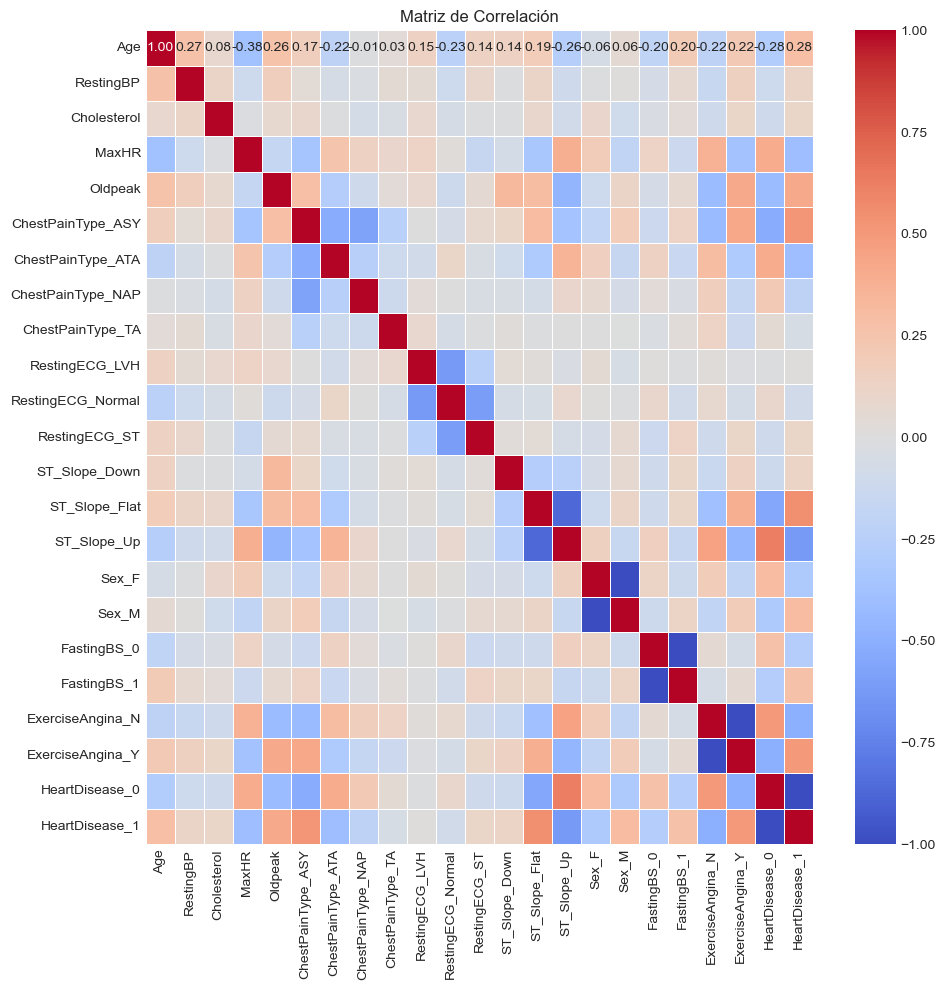

In [87]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoded = encoder.fit_transform(df[categoricas + binarias])
encoded_df = pd.DataFrame(
    encoded.toarray(),
    columns=encoder.get_feature_names_out(categoricas + binarias),
    index=df.index
)
df_encoded = pd.concat([df[numericas], encoded_df], axis=1)

plt.figure(figsize=(10, 10))
sns.heatmap(
    df_encoded.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()